# Pràctica 5: Arbres de Decisió


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **~~dijous abans de les 23:59~~**  <span style="color:orange">**dimecres abans de les 10.00**</span>, és a dir, tindreu les hores de classe més **quasibé** tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)
* B. Selecció de mesures d'atributs (20%)
* C. Pruning (20%)
* D. Ensembles (30%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.


### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation. Al apartat D s'utilitzaràn els dos. De tota forma, si ho preferiu, també podeu anar fer proves amb income_evaluation ens els altres apartats.


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**


In [1]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple

dataset_path = 'car_evaluation.csv'
target_name = 'class'

#dataset_path = 'income_evaluation.csv'
#target_name = 'income'

dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

**[Off-topic]** Pel que es pregunti de on prové la `y` minúsucla pel target i la `X` majuscula de les dades.. [Enllaç](https://stats.stackexchange.com/questions/389395/why-uppercase-for-x-and-lowercase-for-y)

In [3]:
display(dataset)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [4]:
# Una manenra d'aplicar-ho a columnes en concret
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

encoded_X_train_1 = encoder.fit_transform(X_train)
encoded_X_test_1 = encoder.transform(X_test)


/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [5]:
# Una altra manera per fer-ho a totes les columnes no númeriques..

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))

# Inverse the encoded
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

# Using the dictionary to label future data
# X_train.apply(lambda x: encoders[x.name].transform(x))

print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)
print(type(encoded_X_train_2))


 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706        0      2      2        0         1       2
678        0      2      1        0         1       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         1       0
1294       2      1      3        2         0       2
860        0      1      3        2         1       0
1459       1      0      2        0         2       2
1126       2      2      1        2         2       2

[1382 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


### Preguntes
#### 1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.

La primera que provarem es una de les que ens heu donat com a exemple: la Ordinary Encoder.

La seva principal ventatge es la senzillesa, ja que simplement assigna numeros del 0 al n-1 als membres de les n classes. Per contra, la assignació la fa en l'ordre en que troba les dades, cosa que en certa mesura dona un ordre a les dades (i això pot portar conseqüencies no desitjades).

In [6]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

encoded_X_train_1 = encoder.fit_transform(X_train)
encoded_X_test_1 = encoder.transform(X_test)

print(encoded_X_train_1)

      buying  maint  doors  persons  lug_boot  safety
107        1      1      1        1         1       1
901        2      1      2        2         2       2
1709       3      2      1        3         1       1
706        4      3      3        3         3       2
678        4      3      2        3         3       3
...      ...    ...    ...      ...       ...     ...
1130       2      3      2        1         3       1
1294       2      2      1        1         1       2
860        4      2      1        1         3       1
1459       3      4      3        3         2       2
1126       2      3      2        1         2       2

[1382 rows x 6 columns]


/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


El següent mètode de codificació que provarem es el One-Hot-Encoding. Aquest mètode codifica els elements com a arrays binaris de longitud N (on N=numero de classes). Els arrays de codificació tindrán un únic 1 (la posició del qual indica la classe).

Com a part negativa, podríem dir que els codis d'aquest métode ocupen mes memoria del normal, ja que en principi N classes es poden representar amb $\log_2(N)$ bits.

In [7]:
encoder = ce.OneHotEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

encoded_X_train_2 = encoder.fit_transform(X_train)
encoded_X_test_2 = encoder.transform(X_test)

print(encoded_X_train_2)

      buying_1  buying_2  buying_3  buying_4  maint_1  maint_2  maint_3  \
107          1         0         0         0        1        0        0   
901          0         1         0         0        1        0        0   
1709         0         0         1         0        0        1        0   
706          0         0         0         1        0        0        1   
678          0         0         0         1        0        0        1   
...        ...       ...       ...       ...      ...      ...      ...   
1130         0         1         0         0        0        0        1   
1294         0         1         0         0        0        1        0   
860          0         0         0         1        0        1        0   
1459         0         0         1         0        0        0        0   
1126         0         1         0         0        0        0        1   

      maint_4  doors_1  doors_2  doors_3  doors_4  persons_1  persons_2  \
107         0        1  

/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


El següent mètode de codificació que provarem es el "Helmert Encoder", que compara les mitjanes dels targets associats a cada classe amb les mitjanes de les següents classes per a triar la codificació adequada. Aquesta codificació es especialment util per a problemes en els que les variables a codificar estan ordenades "per tamany" (com en el dataset que estem utilitzant).

In [8]:
encoder = ce.HelmertEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

encoded_X_train_3 = encoder.fit_transform(X_train)
encoded_X_test_3 = encoder.transform(X_test)

print(encoded_X_train_3)

      intercept  buying_0  buying_1  buying_2  maint_0  maint_1  maint_2  \
107           1    -1.000    -1.000    -1.000   -1.000   -1.000   -1.000   
901           1     1.000    -1.000    -1.000   -1.000   -1.000   -1.000   
1709          1     0.000     2.000    -1.000    1.000   -1.000   -1.000   
706           1     0.000     0.000     3.000    0.000    2.000   -1.000   
678           1     0.000     0.000     3.000    0.000    2.000   -1.000   
...         ...       ...       ...       ...      ...      ...      ...   
1130          1     1.000    -1.000    -1.000    0.000    2.000   -1.000   
1294          1     1.000    -1.000    -1.000    1.000   -1.000   -1.000   
860           1     0.000     0.000     3.000    1.000   -1.000   -1.000   
1459          1     0.000     2.000    -1.000    0.000    0.000    3.000   
1126          1     1.000    -1.000    -1.000    0.000    2.000   -1.000   

      doors_0  doors_1  doors_2  persons_0  persons_1  lug_boot_0  lug_boot_1  \
107   

/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


L'últim mètode de codificació que provarem es el "Hash Encoding", qué básicament aplica un Hashing a les categoríes per a codificarles. La ventatge d'aquesta técnica és que no requereix mantenir un diccionari de categoríes observades, i per tant no augmenta el tamany del dataset y permet afegir noves classes.

In [9]:
encoder = ce.HashingEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

encoded_X_train_4 = encoder.fit_transform(X_train)
encoded_X_test_4 = encoder.transform(X_test)

print(encoded_X_train_4)

/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7
0         0      0      0      4      2      0      0      0
1         0      0      0      3      3      0      0      0
2         0      0      0      2      2      0      0      2
3         0      0      0      1      5      0      0      0
4         0      0      0      2      3      0      0      1
...     ...    ...    ...    ...    ...    ...    ...    ...
1377      0      0      0      2      4      0      0      0
1378      0      0      0      1      4      0      0      1
1379      0      0      0      3      2      0      0      1
1380      0      0      0      2      3      0      0      1
1381      0      0      0      2      4      0      0      0

[1382 rows x 8 columns]


#### 2. Crea un arbre arbre de decisió amb les dades transformades.

Com la codicicació de Helmert funciona especialment bé quan les variables a codificar estan ordenades "per tamany", que es el nostre cas, utilitzarem aquesta codificació.

In [10]:
from sklearn import tree


clf = tree.DecisionTreeClassifier(random_state=23)
model = clf.fit(encoded_X_train_3, y_train)

#### 3. Mostra el arbre de diferents formes: [exemple](https://mljar.com/blog/visualize-decision-tree/)

In [11]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_15 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_4 <= -0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_2 <= 1.00
|   |   |   |   |   |--- class: unacc
|   |   |   |   |--- feature_2 >  1.00
|   |   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |   |--- feature_9 <= 1.00
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_9 >  1.00
|   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- feature_12 <= -0.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_12 >  -0.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 1.00
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |

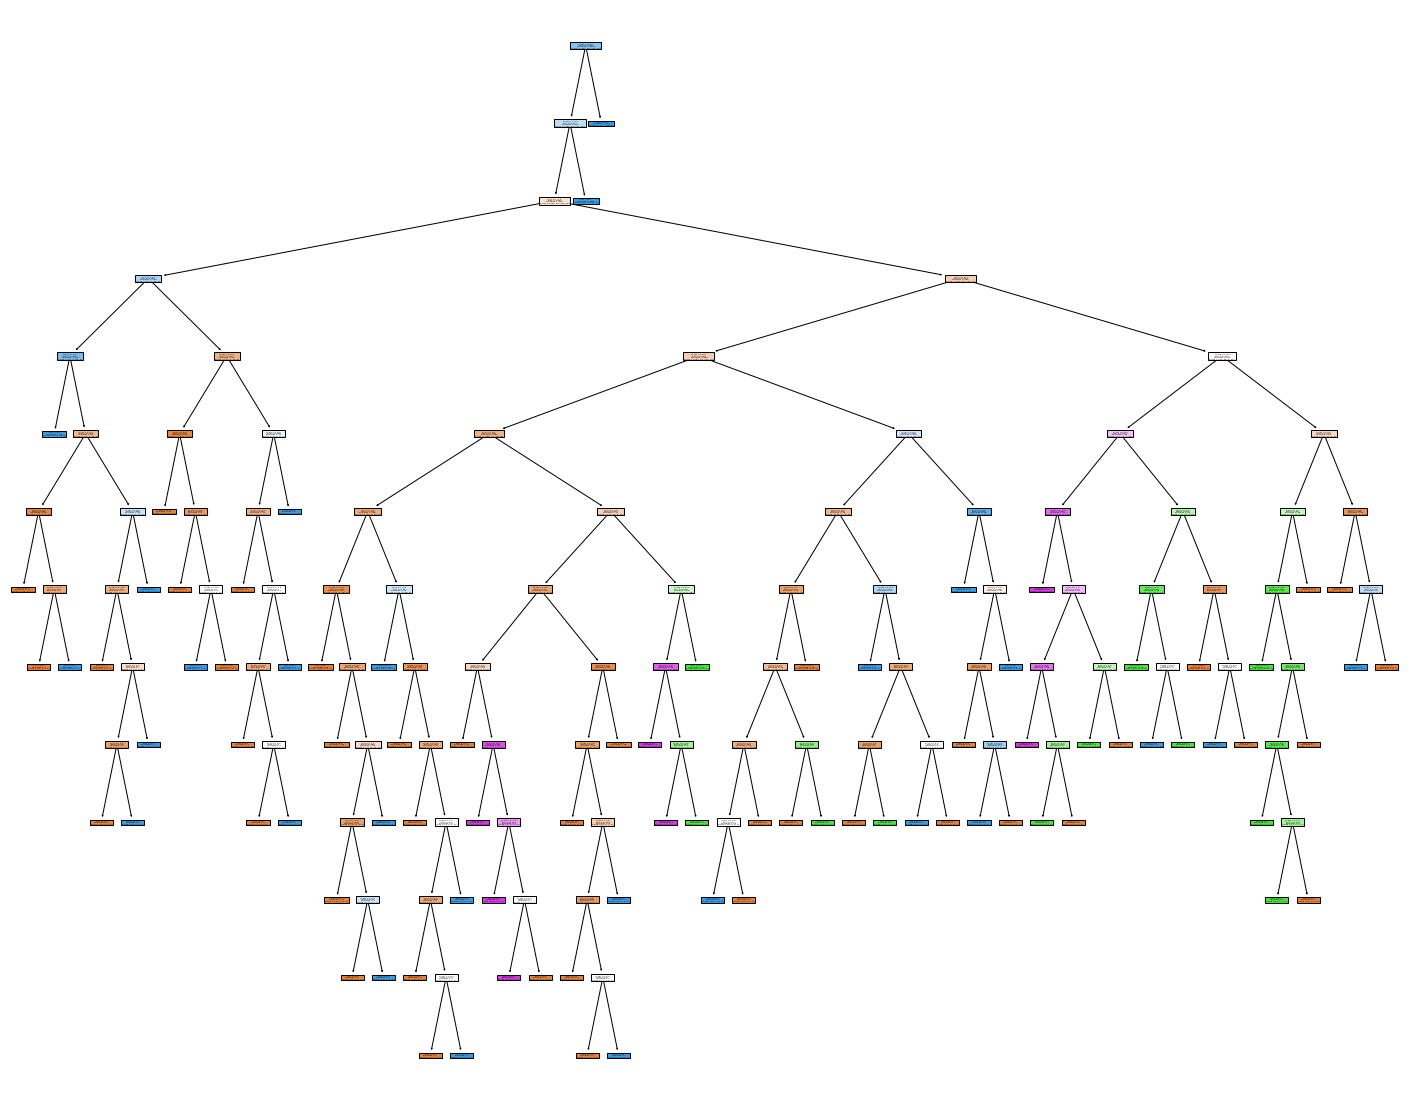

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

#### 4. Extreu caracteristiques que quantifiquin com és l'arbre. Més endavant també en farem ús per comparar diferents arbres. A continuació et mostro algunes possibles característiques. Penseu en generar-ne alguna més que cregueu útil:
 * número de nodes total,
 * número de nodes fulla,
 * ratio de nodes fulla respecte el total,
 * profunditat mitjana de les fulles,
 * atributs més utilitzats,
 * entropia o impuresa dels nodes fulla
 * ... 

In [13]:
leaves = clf.tree_.children_left == -1
leaves = np.arange(0,clf.tree_.node_count)[leaves]

def get_node_depths(tree):
    def get_node_depths_(current_node, current_depth, l, r, depths):
        depths += [current_depth]
        if l[current_node] != -1 and r[current_node] != -1:
            get_node_depths_(l[current_node], current_depth + 1, l, r, depths)
            get_node_depths_(r[current_node], current_depth + 1, l, r, depths)

    depths = []
    get_node_depths_(0, 0, tree.children_left, tree.children_right, depths) 
    return np.array(depths)



print("El numero total de nodes es", clf.tree_.node_count)
print("El numero de nodes fulla es", clf.get_n_leaves())
print("El ratio de nodes fulla respecte del total es", clf.get_n_leaves()/clf.tree_.node_count)
print("La profunditat mitjana de les fulles es", np.mean(get_node_depths(clf.tree_)[leaves]))
print("Els atributs mes utilitzats son")
print("La impuresa mitjana dels nodes fulla es", np.mean(clf.tree_.impurity[leaves]))
print("La importància (Gini importance) dels diferents atributs es", clf.tree_.compute_feature_importances())

El numero total de nodes es 171
El numero de nodes fulla es 86
El ratio de nodes fulla respecte del total es 0.5029239766081871
La profunditat mitjana de les fulles es 9.162790697674419
Els atributs mes utilitzats son
La impuresa mitjana dels nodes fulla es 0.0
La importància (Gini importance) dels diferents atributs es [0.         0.09009029 0.07134811 0.00377937 0.07096284 0.02314845
 0.07024745 0.0180112  0.002402   0.05080317 0.03317813 0.22259626
 0.08779882 0.00904386 0.09069168 0.15589835]


#### 5. Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?

## B. Selecció de mesures d'atributs (20%)
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

### Preguntes

#### 1. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree


parameters = {'splitter':['best', 'random'], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3, 4, 5],
              'min_weight_fraction_leaf':np.linspace(0, 0.5, 6), 
              'max_features':[encoded_X_train_3.shape[1],"sqrt", 'log2'],
              'min_impurity_decrease':np.linspace(0, 1, 11)}

tree_model = tree.DecisionTreeClassifier(random_state=23, criterion='entropy')
clf = GridSearchCV(tree_model, parameters)

search_entropy = clf.fit(encoded_X_train_3, y_train)

print("BEST PARAMS: {}".format(search_entropy.best_params_))
print("BEST SCORE: {}".format(search_entropy.best_score_))

BEST PARAMS: {'max_features': 16, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
BEST SCORE: 0.9688772039972793


#### 2. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree


parameters = {'splitter':['best', 'random'], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3, 4, 5],
              'min_weight_fraction_leaf':np.linspace(0, 0.5, 6), 
              'max_features':[encoded_X_train_3.shape[1],"sqrt", 'log2'],
              'min_impurity_decrease':np.linspace(0, 1, 11)}

tree_model = tree.DecisionTreeClassifier(random_state=23, criterion='gini')
clf = GridSearchCV(tree_model, parameters)

search_gini = clf.fit(encoded_X_train_3, y_train)

print("BEST PARAMS: {}".format(search_gini.best_params_))
print("BEST SCORE: {}".format(search_gini.best_score_))

BEST PARAMS: {'max_features': 16, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
BEST SCORE: 0.9659865013341704


#### 3. S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

Anem a veure primer les característiques del millor arbre obtingut amb el criteri de guany d'entropía

El numero total de nodes es 155
El numero de nodes fulla es 78
El ratio de nodes fulla respecte del total es 0.5032258064516129
La profunditat mitjana de les fulles es 9.14102564102564
La impuresa mitjana dels nodes fulla es 0.08974358974358974
La importància (Gini importance) dels diferents atributs es [0.         0.08537466 0.04910586 0.03714225 0.04893206 0.04873767
 0.05222582 0.01755416 0.         0.04982535 0.01964928 0.20624441
 0.11333481 0.01180442 0.07476354 0.18530573]


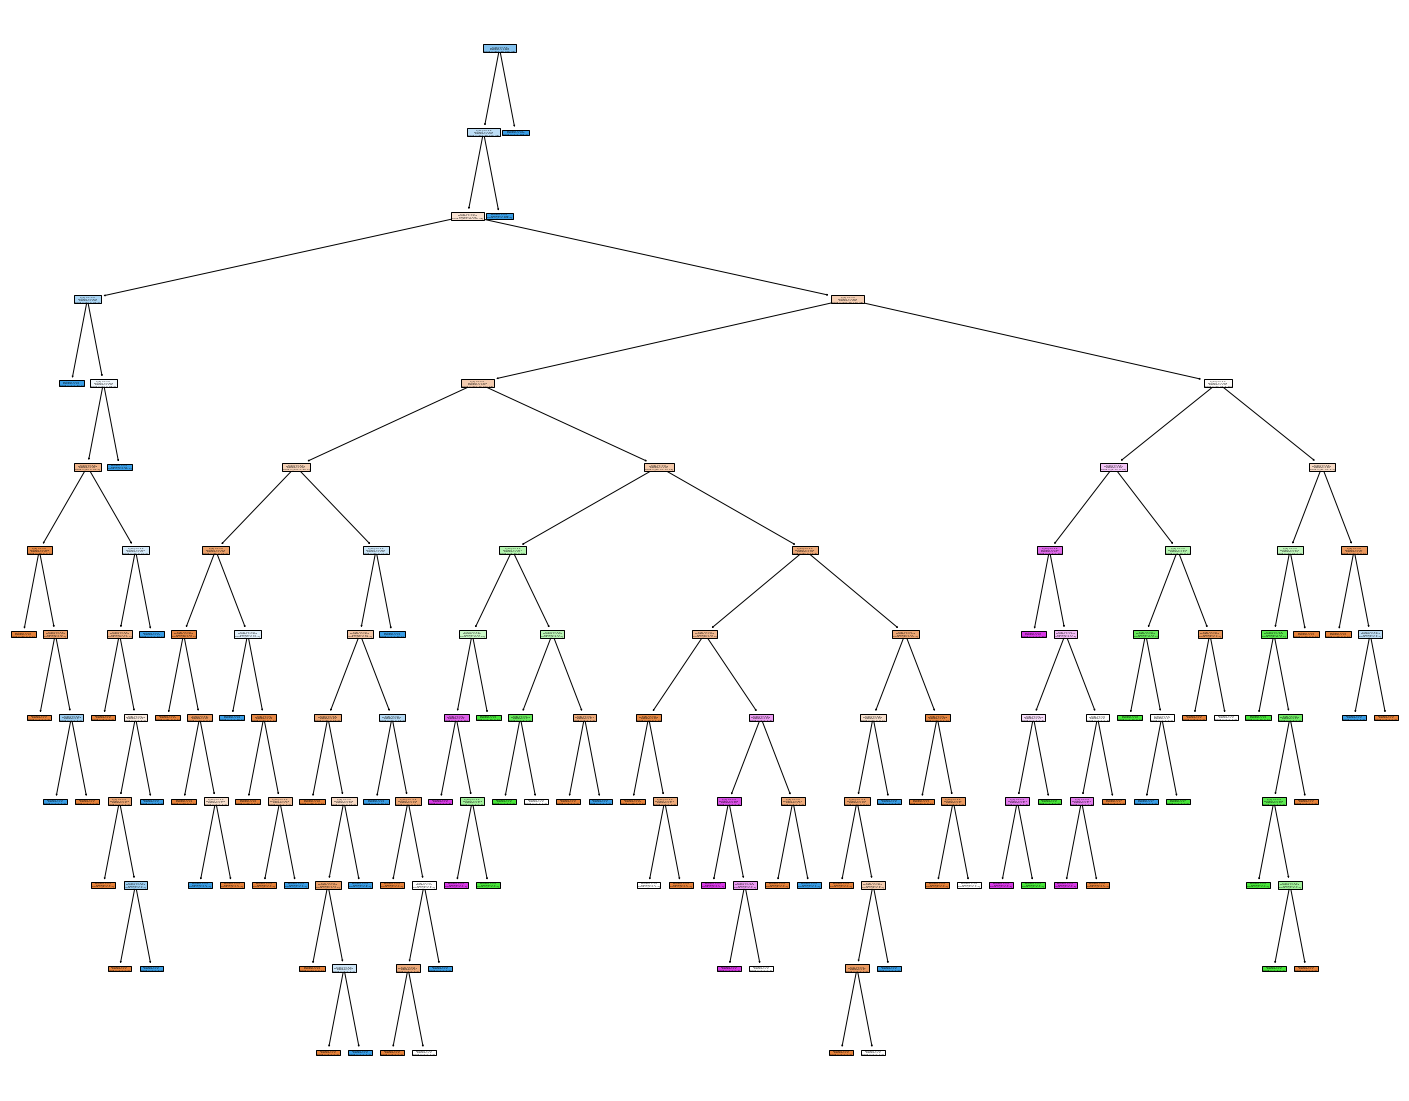

In [16]:
clf_entropy = tree.DecisionTreeClassifier(random_state=23, criterion='entropy', **search_entropy.best_params_)
model_entropy = clf_entropy.fit(encoded_X_train_3, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy, 
                   filled=True)

leaves = clf_entropy.tree_.children_left == -1
leaves = np.arange(0,clf_entropy.tree_.node_count)[leaves]
print("El numero total de nodes es", clf_entropy.tree_.node_count)
print("El numero de nodes fulla es", clf_entropy.get_n_leaves())
print("El ratio de nodes fulla respecte del total es", clf_entropy.get_n_leaves()/clf_entropy.tree_.node_count)
print("La profunditat mitjana de les fulles es", np.mean(get_node_depths(clf_entropy.tree_)[leaves]))
print("La impuresa mitjana dels nodes fulla es", np.mean(clf_entropy.tree_.impurity[leaves]))
print("La importància (Gini importance) dels diferents atributs es", clf_entropy.tree_.compute_feature_importances())

A continuació veiem les característiques del millor àrbre obtingut amb el criteri de gini:

El numero total de nodes es 171
El numero de nodes fulla es 86
El ratio de nodes fulla respecte del total es 0.5029239766081871
La profunditat mitjana de les fulles es 9.162790697674419
La impuresa mitjana dels nodes fulla es 0.0
La importància (Gini importance) dels diferents atributs es [0.         0.09009029 0.07134811 0.00377937 0.07096284 0.02314845
 0.07024745 0.0180112  0.002402   0.05080317 0.03317813 0.22259626
 0.08779882 0.00904386 0.09069168 0.15589835]


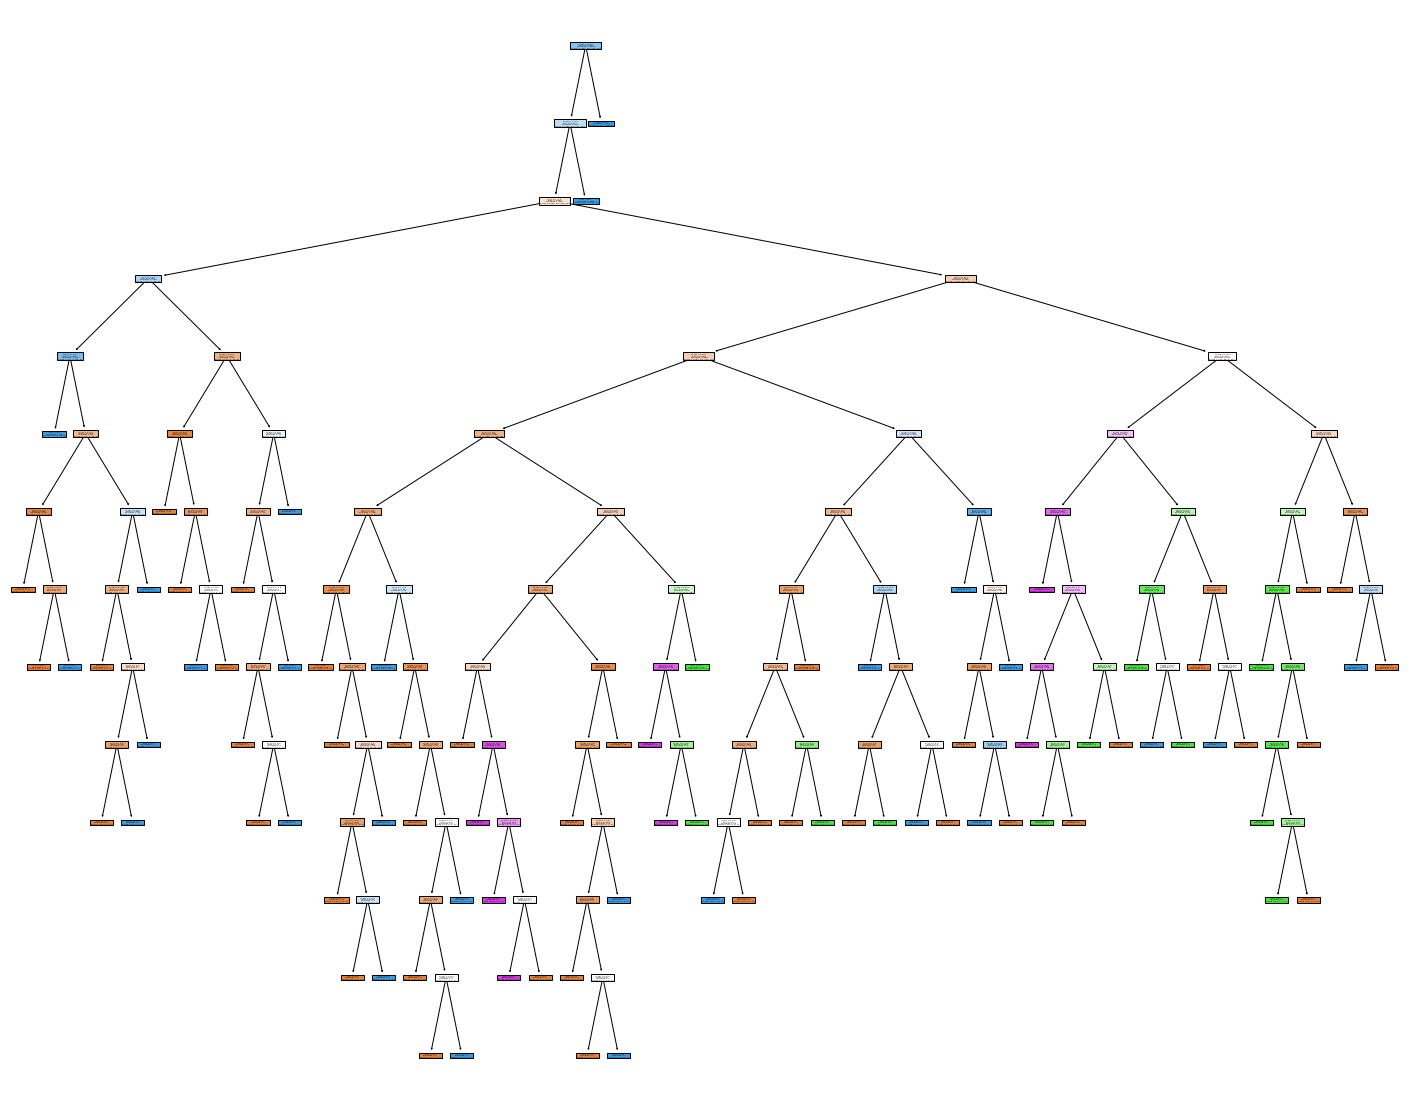

In [17]:
clf_gini = tree.DecisionTreeClassifier(random_state=23, criterion='gini', **search_gini.best_params_)
model_gini = clf_gini.fit(encoded_X_train_3, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   filled=True)

leaves = clf_gini.tree_.children_left == -1
leaves = np.arange(0,clf_gini.tree_.node_count)[leaves]
print("El numero total de nodes es", clf_gini.tree_.node_count)
print("El numero de nodes fulla es", clf_gini.get_n_leaves())
print("El ratio de nodes fulla respecte del total es", clf_gini.get_n_leaves()/clf_gini.tree_.node_count)
print("La profunditat mitjana de les fulles es", np.mean(get_node_depths(clf_gini.tree_)[leaves]))
print("La impuresa mitjana dels nodes fulla es", np.mean(clf_gini.tree_.impurity[leaves]))
print("La importància (Gini importance) dels diferents atributs es", clf_gini.tree_.compute_feature_importances())

Com es pot veure analitzant els resultats, tots dos models son molt similars tant en forma com en termes quantificables. Això si, el model entrenat amb el criteri de guany d'entropía es lleugerament superior, doncs té menys nodes, la profunditat mitjana de les fulles es lleugerament menor i la score obtinguda en el grid search es lleugerament superior.

A més, com veiem a continuació, la seva accuracy sobre el conjunt de test també es superior a la del model entrenat amb el criteri de gini.

In [18]:
from sklearn.metrics import accuracy_score

Y_test_pred = model_entropy.predict(encoded_X_test_3)
acc_entropy = accuracy_score(y_test, Y_test_pred)

Y_test_pred = model_gini.predict(encoded_X_test_3)
acc_gini = accuracy_score(y_test, Y_test_pred)

print("La accuracy sobre el conjunt de test del model amb el criteri de guany d'entropia és", acc_entropy)
print("La accuracy sobre el conjunt de test del model amb el criteri de gini és", acc_gini)

La accuracy sobre el conjunt de test del model amb el criteri de guany d'entropia és 0.9653179190751445
La accuracy sobre el conjunt de test del model amb el criteri de gini és 0.9566473988439307


## C. Pruning (20%)

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada, comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.

### Preguntes

#### 1. Amb els parametres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?

Hem augmentat els valors dels paràmetres 'min_impurity_decrease' i 'min_weight_fraction_leaf', que son els que permeten fer poda prèvia. Sabem que ha donat resultats perque la accuracy ha baixat tant sobre el conjunt de training com sobre el de test, i ara es molt similar en tots dos conjunts.

No hem usat el paràmetre max_depth perque ja estem limitant la profunditat de dorma implícita (i "inteligent").

In [19]:
import copy


new_params = copy.copy(search_entropy.best_params_)
# Hacemos que solo se extiendan aquellos nodos que al hacerlo generaran un decrecimiento de la entropia de como minimo 0.1
new_params['min_impurity_decrease'] = 0.01
# suma ponderada dels inputs minima per a estar en una fulla
new_params['min_weight_fraction_leaf'] = 0.01

clf_pre_prunned= tree.DecisionTreeClassifier(random_state=23, criterion='entropy', **new_params)
model_pre_prunned = clf_pre_prunned.fit(encoded_X_train_3, y_train)


Y_train_pred = model_pre_prunned.predict(encoded_X_train_3)
acc_pre_prunned = accuracy_score(y_train, Y_train_pred)

print("La accuracy sobre el conjunt de training del model amb pre-prunning és", acc_pre_prunned)

Y_test_pred = model_pre_prunned.predict(encoded_X_test_3)
acc_pre_prunned = accuracy_score(y_test, Y_test_pred)

print("La accuracy sobre el conjunt de test del model amb pre-prunning és", acc_pre_prunned)

La accuracy sobre el conjunt de training del model amb pre-prunning és 0.9204052098408104
La accuracy sobre el conjunt de test del model amb pre-prunning és 0.9132947976878613


#### 2. Realitza una poda posterior del arbre [Pista](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning).

A continuació veurem quina es la millor alpha per al prunning.

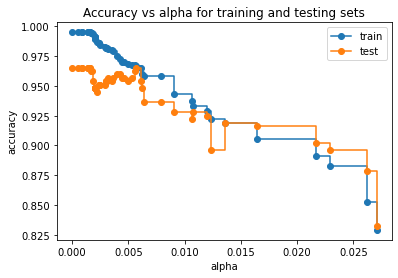

La mejor alpha es 0.005683936776308562


In [20]:
clf = tree.DecisionTreeClassifier(random_state=23, criterion='entropy', **search_entropy.best_params_)
path = clf.cost_complexity_pruning_path(encoded_X_train_3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas[:-5]:
    clf = tree.DecisionTreeClassifier(random_state=23, criterion='entropy', ccp_alpha=ccp_alpha, **search_entropy.best_params_)
    clf.fit(encoded_X_train_3, y_train)
    clfs.append(clf)

train_scores = [clf.score(encoded_X_train_3, y_train) for clf in clfs]
test_scores = [clf.score(encoded_X_test_3, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-5], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-5], test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


max_score = 0
best = None
for i, score in enumerate(test_scores):
    if score >= max_score:
        max_score = score
        best = i

print("La mejor alpha es", ccp_alphas[best])

model_post_prunned = clfs[best]

#### 3. Compara els arbres resultants i els resultats que se'n obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A part de visualment, compara'ls també quantificablement.

En els resultats numerics (anàlisis de la accuracy sobre training i sobre test) veiem que el model amb post-prunning es millor que el model amb pre-pruning. Tots dos models generalitzen força bé (tenen accuracy semblant en els conjunt de training i de test, és a dir, no hi ha overfitting), però les accuracy del model amb post-prunning son bastant millors.

In [21]:
Y_train_pred = model_pre_prunned.predict(encoded_X_train_3)
acc_pre_prunned = accuracy_score(y_train, Y_train_pred)
print("La accuracy sobre el conjunt de training del model amb pre-prunning és", acc_pre_prunned)

Y_train_pred = model_post_prunned.predict(encoded_X_train_3)
acc_post_prunned = accuracy_score(y_train, Y_train_pred)
print("La accuracy sobre el conjunt de training del model amb post-prunning és", acc_post_prunned)

Y_test_pred = model_pre_prunned.predict(encoded_X_test_3)
acc_pre_prunned = accuracy_score(y_test, Y_test_pred)
print("La accuracy sobre el conjunt de test del model amb pre-prunning és", acc_pre_prunned)

Y_test_pred = model_post_prunned.predict(encoded_X_test_3)
acc_post_prunned = accuracy_score(y_test, Y_test_pred)
print("La accuracy sobre el conjunt de test del model amb post-prunning és", acc_post_prunned)

La accuracy sobre el conjunt de training del model amb pre-prunning és 0.9204052098408104
La accuracy sobre el conjunt de training del model amb post-prunning és 0.9667149059334298
La accuracy sobre el conjunt de test del model amb pre-prunning és 0.9132947976878613
La accuracy sobre el conjunt de test del model amb post-prunning és 0.9653179190751445


A continuació mostrem l'arbre generat amb pre-prunning i les seves estadístiques

El numero total de nodes es 35
El numero de nodes fulla es 18
El ratio de nodes fulla respecte del total es 0.5142857142857142
La profunditat mitjana de les fulles es 5.833333333333333
La impuresa mitjana dels nodes fulla es 0.5081187298051025
La importància (Gini importance) dels diferents atributs es [0.         0.08529323 0.06319395 0.06068752 0.10737003 0.
 0.02251864 0.         0.         0.         0.         0.26541432
 0.09066831 0.         0.06638551 0.23846849]


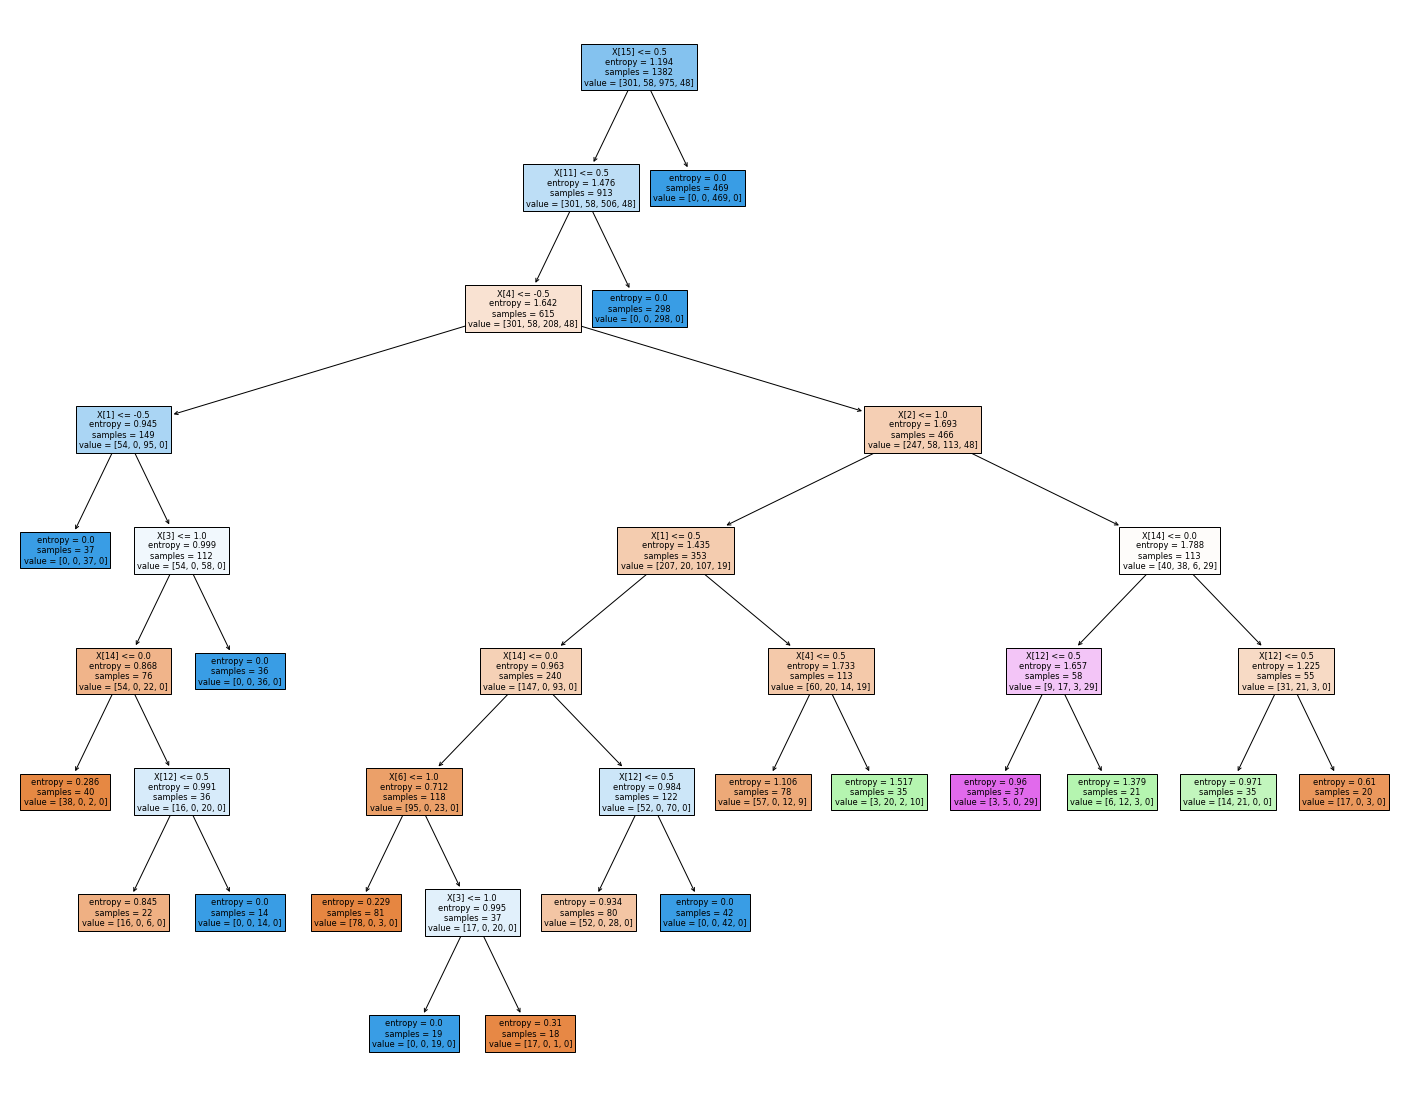

In [22]:
clf = model_pre_prunned

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

leaves = clf.tree_.children_left == -1
leaves = np.arange(0,clf.tree_.node_count)[leaves]
print("El numero total de nodes es", clf.tree_.node_count)
print("El numero de nodes fulla es", clf.get_n_leaves())
print("El ratio de nodes fulla respecte del total es", clf.get_n_leaves()/clf.tree_.node_count)
print("La profunditat mitjana de les fulles es", np.mean(get_node_depths(clf.tree_)[leaves]))
print("La impuresa mitjana dels nodes fulla es", np.mean(clf.tree_.impurity[leaves]))
print("La importància (Gini importance) dels diferents atributs es", clf.tree_.compute_feature_importances())

A continuació mostrem l'arbre generat amb post-prunning i les seves estadístiques

El numero total de nodes es 65
El numero de nodes fulla es 33
El ratio de nodes fulla respecte del total es 0.5076923076923077
La profunditat mitjana de les fulles es 7.303030303030303
La impuresa mitjana dels nodes fulla es 0.3459787605218352
La importància (Gini importance) dels diferents atributs es [0.         0.0952483  0.05478499 0.04143778 0.0545911  0.05437421
 0.05304489 0.         0.         0.00928688 0.         0.23009674
 0.10955081 0.00743782 0.08341    0.20673648]


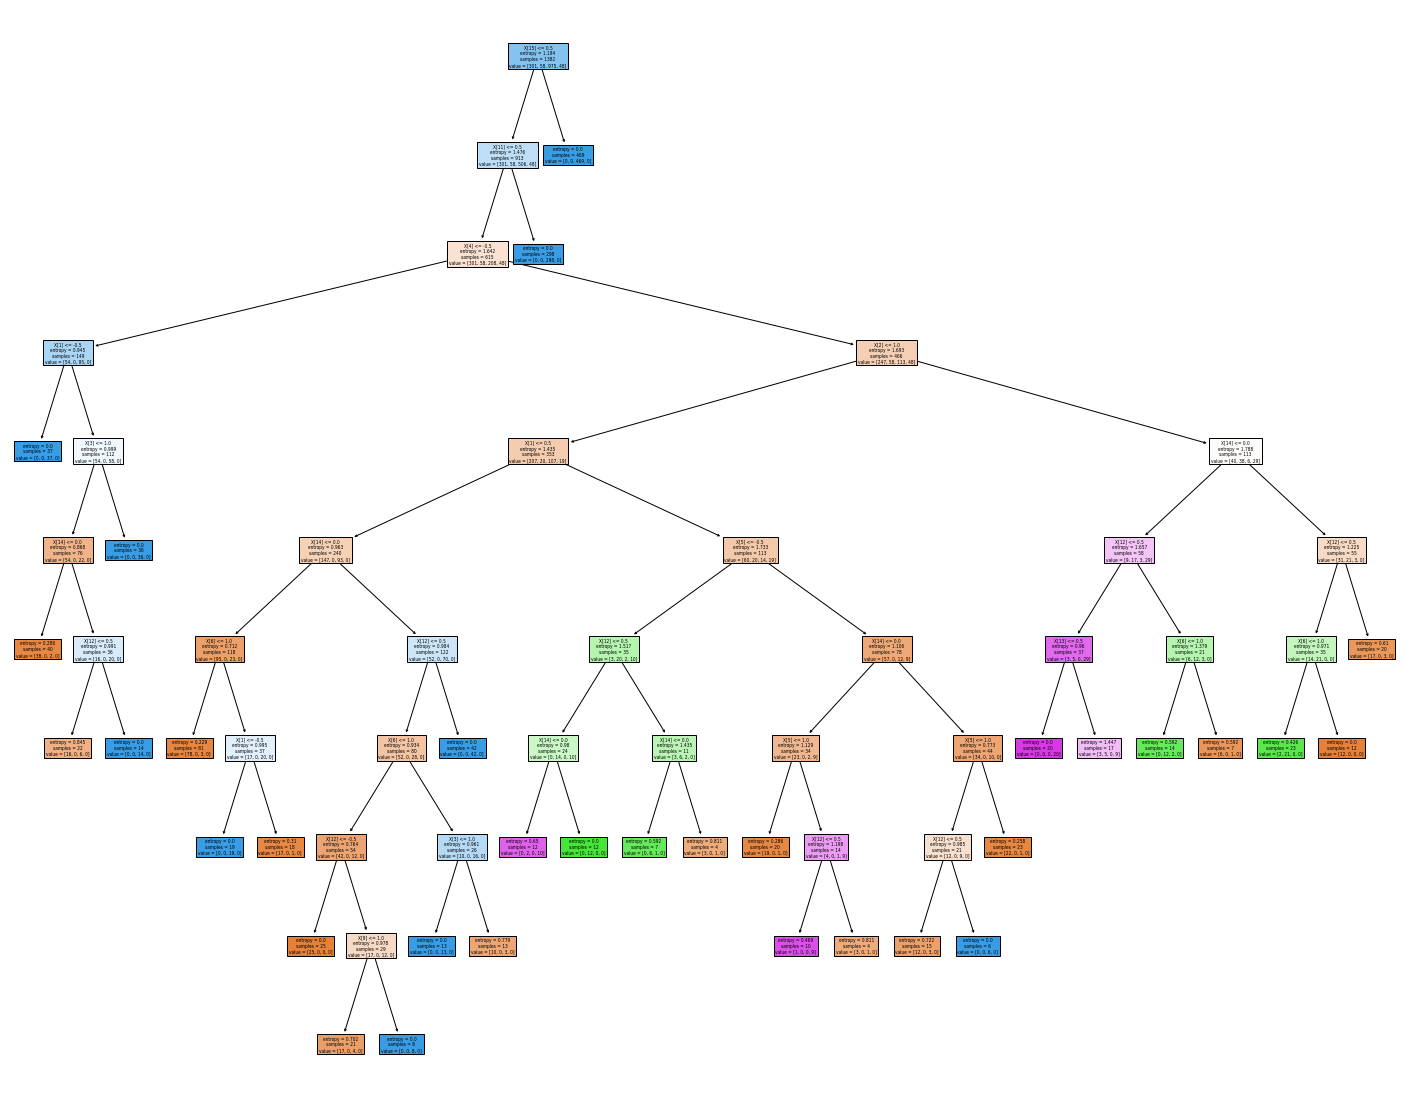

In [23]:
clf = model_post_prunned

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

leaves = clf.tree_.children_left == -1
leaves = np.arange(0,clf.tree_.node_count)[leaves]
print("El numero total de nodes es", clf.tree_.node_count)
print("El numero de nodes fulla es", clf.get_n_leaves())
print("El ratio de nodes fulla respecte del total es", clf.get_n_leaves()/clf.tree_.node_count)
print("La profunditat mitjana de les fulles es", np.mean(get_node_depths(clf.tree_)[leaves]))
print("La impuresa mitjana dels nodes fulla es", np.mean(clf.tree_.impurity[leaves]))
print("La importància (Gini importance) dels diferents atributs es", clf.tree_.compute_feature_importances())

Com veiem, l'arbre generat amb pre-prunning es més petit (té menys nodes i una profunditat mitjana menor). Això explica perque les accuracy del model amb post-prunning son millors. Tot i això, tenint en compte que el model amb pre-prunning té la meitat de nodes que el model amb post-prunning, la diferencia de accuracy's no és tant gran (0.913 vs 0.965)

## D. Ensembles (30%)

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques [documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.

### Preguntes

### 1. Aplica models d'ensembles a les **dues** bases de dades. 

Aplicarem els models RandomForestClassifier, ExtraTreesClassifier i AdaBoostClassifier. Per a triar el millor aplicarem una cross validation.

A continuació apliquem els models sobre la base de dades sobre al que venim treballant.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

hyperparams = copy.copy(search_entropy.best_params_)
del hyperparams['splitter']

models_ensembles = [ensemble.RandomForestClassifier, ensemble.ExtraTreesClassifier, ensemble.AdaBoostClassifier]
scores = []

for i,model_ensemble in enumerate(models_ensembles):
    if i == 2:
        clf = model_ensemble()
    else:
        clf = model_ensemble(criterion='gini', **hyperparams)
    
    score = cross_val_score(clf, encoded_X_train_3, y_train, cv=5)
    scores.append(score.mean())

print("Els scores obtinguts fent cross-validation als diferents models de ensemble son", scores)

Els scores obtinguts fent cross-validation als diferents models de ensemble son [0.9681682624391776, 0.9710563490817767, 0.8371893475644849]


Pasem ara a aplicar els models sobre la nova base de dades

In [25]:
dataset_path = 'income_evaluation.csv'
target_name = 'income'

second_dataset = load_dataset(dataset_path)
second_y = second_dataset[target_name]
second_X = second_dataset.drop(target_name, axis="columns")

second_X_train, second_X_test, second_y_train, second_y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

encoder = ce.HelmertEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

second_encoded_X_train_3 = encoder.fit_transform(second_X_train)
second_encoded_X_test_3 = encoder.transform(second_X_test)


scores = []

for i,model_ensemble in enumerate(models_ensembles):
    if i == 2:
        clf = model_ensemble()
    else:
        clf = model_ensemble(criterion='gini', **hyperparams)
    
    score = cross_val_score(clf, second_encoded_X_train_3, second_y_train, cv=5)
    scores.append(score.mean())

print("Els scores obtinguts fent cross-validation als diferents models de ensemble son", scores)

/home/albert/miniconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Els scores obtinguts fent cross-validation als diferents models de ensemble son [0.9688850520588081, 0.9710589651022863, 0.8371893475644849]


### 2. Compara els resultats obtinguts amb els diferents models. 

Com veiem ens els resultats de les cross-validation, tant el model RandomForestClassifier com el model ExtraTreesClassifier donen molt bons resultats, tot i que son gairebé idéntics als obtinguts sense ensembles (per al primer dataset).

En el primer dataset es lleugerament millor el model RandomForestClassifier, mentre que en el segon dataset es lleugerament millor el model RandomForestClassifier.

### 3. Quin dona millors resultats?

Cap dels models es clarament millor que l'altre. Com hem comentat en la pregunta anterior, en el primer dataset es lleugerament millor el model RandomForestClassifier, mentre que en el segon dataset es lleugerament millor el model RandomForestClassifier.

### 4. Podries tornar a combinar la sortida dels diferents classificadors que has provat?

Si, nomès hauria d'executarlos tots i donar com a output l'output "mes votat".

In [26]:
def super_model(model1, model2, model3, X):
    out1 = model1.predict(X)
    out2 = model2.predict(X)
    out3 = model3.predict(X)
    
    out = []
    
    for i in range(len(out1)):
        if out2[i] == out3[i]:
            out.append(out2[i])
        else:
            out.append(out1[i])
    
    return out
    

model1 = ensemble.RandomForestClassifier(criterion='gini', **hyperparams)
model2 = ensemble.ExtraTreesClassifier(criterion='gini', **hyperparams)
model3 = ensemble.AdaBoostClassifier()

for model in [model1, model2, model3]:
    model = model.fit(encoded_X_train_3, y_train)


Y_train_pred = super_model(model1, model2, model3, encoded_X_train_3)
acc_post_prunned = accuracy_score(y_train, Y_train_pred)
print("La accuracy sobre el conjunt de training és", acc_post_prunned)

Y_test_pred = super_model(model1, model2, model3, encoded_X_test_3)
acc_pre_prunned = accuracy_score(y_test, Y_test_pred)
print("La accuracy sobre el conjunt de test és", acc_pre_prunned)

La accuracy sobre el conjunt de training és 1.0
La accuracy sobre el conjunt de test és 0.9682080924855492


### 5. I si combines models que s'han après amb caracteristiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?

Es d'esperar que millori, ja que així els defectes de cada codificació es veuràn mitigats. En efecte, observem que la accuracy sobre el conjunt de test ha pujat lleugerament respecte del que veníem obtenint.

In [27]:
def super_model_W_different_codings(model1, model2, model3, X1, X2, X3):
    out1 = model1.predict(X1)
    out2 = model2.predict(X2)
    out3 = model3.predict(X3)
    
    out = []
    
    for i in range(len(out1)):
        if out2[i] == out3[i]:
            out.append(out2[i])
        else:
            out.append(out1[i])
    
    return out


coding1 = encoded_X_train_3
coding2 = encoded_X_train_2
coding3 = encoded_X_train_4

model1 = ensemble.RandomForestClassifier(criterion='gini', **hyperparams)
model1 = model1.fit(coding1, y_train)
model2 = ensemble.RandomForestClassifier(criterion='gini', **hyperparams)
model2 = model2.fit(coding2, y_train)
hyperparams['max_features'] = 8
model3 = ensemble.RandomForestClassifier(criterion='gini', **hyperparams)
model3 = model3.fit(coding3, y_train)

Y_train_pred = super_model_W_different_codings(model1, model2, model3, coding1, coding2, coding3)
acc_post_prunned = accuracy_score(y_train, Y_train_pred)
print("La accuracy sobre el conjunt de training és", acc_post_prunned)

Y_test_pred = super_model_W_different_codings(model1, model2, model3, encoded_X_test_3, encoded_X_test_2, encoded_X_test_4)
acc_pre_prunned = accuracy_score(y_test, Y_test_pred)
print("La accuracy sobre el conjunt de test és", acc_pre_prunned)

La accuracy sobre el conjunt de training és 0.9985528219971056
La accuracy sobre el conjunt de test és 0.9624277456647399
